# Merge BERT 42 logs

In [1]:
from tensorboard.backend.event_processing import event_accumulator
from tensorboard_logger import Logger as TbLogger
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
path1 = 'mylogs/tsp_100/_BERT_seed_42_20220730T234410/events.out.tfevents.1659217450.led'
path2 = 'mylogs/tsp_100/_BERT_seed_42_20220801T095326/events.out.tfevents.1659340406.led'

ea1 = event_accumulator.EventAccumulator(path1)
ea1.Reload()
ea2 = event_accumulator.EventAccumulator(path2)
ea2.Reload()

print(ea1.Tags()['scalars'])

only_epoch_logs = {'learnrate_pg0', 'val_avg_reward'}

['learnrate_pg0', 'avg_cost', 'actor_loss', 'nll', 'grad_norm', 'grad_norm_clipped', 'val_avg_reward']


In [3]:
for serie_name in ea1.Tags()['scalars']:

    serie1 = [e.value for e in ea1.Scalars(serie_name)]
    serie2 = [e.value for e in ea2.Scalars(serie_name)]

    print('ea1:\t', len(serie1), '\t', 'ea2:\t', len(serie2))

ea1:	 98 	 ea2:	 19
ea1:	 4878 	 ea2:	 900
ea1:	 4878 	 ea2:	 900
ea1:	 4878 	 ea2:	 900
ea1:	 4878 	 ea2:	 900
ea1:	 4878 	 ea2:	 900
ea1:	 97 	 ea2:	 18


In [4]:
batch_size = 512
epoch_size = 1280000
num_epochs = 100
log_step = 50

print('n batches', num_epochs*epoch_size/batch_size/log_step)

done_batches = int(97*epoch_size/batch_size/log_step)
print('done batches', done_batches)
remaining_batches = int((num_epochs-97)*epoch_size/batch_size/log_step)
print('remaining_batches', remaining_batches)

n batches 5000.0
done batches 4850
remaining_batches 150


## Merge

serie_len: 100


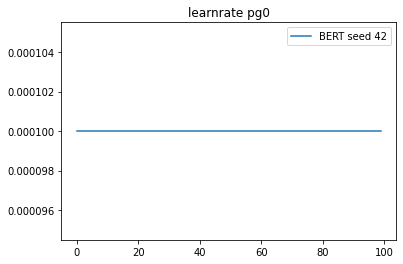

serie_len: 5000


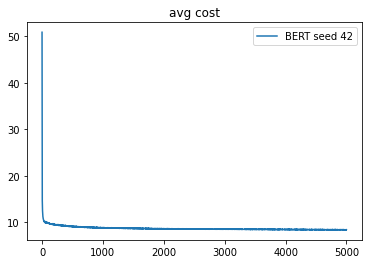

serie_len: 5000


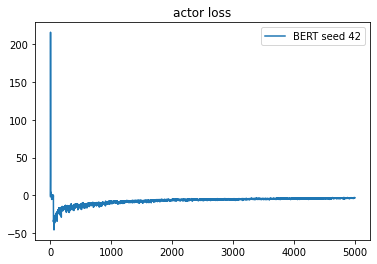

serie_len: 5000


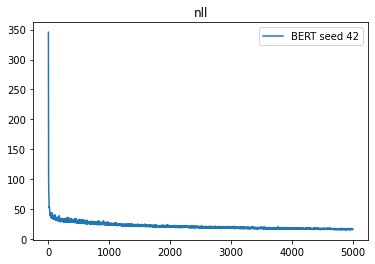

serie_len: 5000


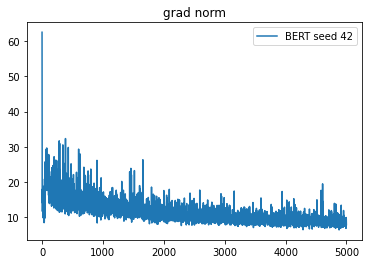

serie_len: 5000


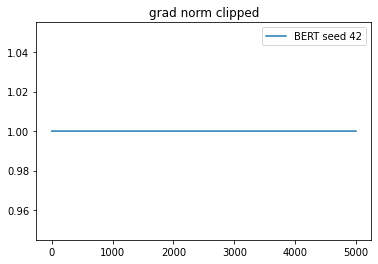

serie_len: 100


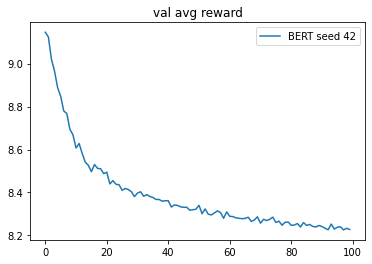

In [5]:
d = {ea1: path1, ea2: path2}
eas = list(d.keys())
names = list(d.values())

for ea in eas:
    ea.Reload()

import os
new_path = 'mylogs/tsp_100/BERT_seed_42'
file_exists = os.listdir(new_path) == []
if file_exists:
    tb_logger = TbLogger(new_path)

series_old = dict()

for serie_name in ea1.Tags()['scalars']:

    done_batches_ = done_batches if serie_name not in only_epoch_logs else 97
    remaining_batches_ = remaining_batches if serie_name not in only_epoch_logs else num_epochs-97

    serie = [e.value for e in eas[0].Scalars(serie_name)][:done_batches_] + \
            [e.value for e in eas[1].Scalars(serie_name)][:remaining_batches_]

    print('serie_len:', len(serie))
    plt.plot(serie, label='BERT seed 42')

    if file_exists:
        for step, value in enumerate(serie):
            tb_logger.log_value(serie_name, value, step)

    series_old[serie_name] = serie
        
    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()

## Verify

In [6]:
import glob
file_path = logs = glob.glob(new_path+'/events.out.*')[0].replace('\\','/')

ea = event_accumulator.EventAccumulator(file_path)
ea.Reload()

series_new = dict()

for serie_name in ea.Tags()['scalars']:
    serie = [e.value for e in ea.Scalars(serie_name)]
    series_new[serie_name] = serie

print('correct:', series_old == series_new)

correct: True
